In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/master/Social_Network_Ads.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
# Basic dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

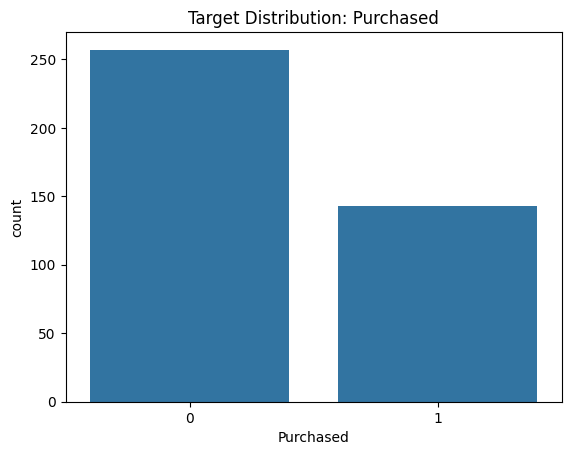

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="Purchased")
plt.title("Target Distribution: Purchased")
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])   # Female=0, Male=1

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [6]:
X = df[['Age', 'EstimatedSalary', 'Gender']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)
pred_gini = dt_gini.predict(X_test)

print("Gini Accuracy:", accuracy_score(y_test, pred_gini))

Gini Accuracy: 0.825


In [8]:
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
pred_entropy = dt_entropy.predict(X_test)

print("Entropy Accuracy:", accuracy_score(y_test, pred_entropy))

Entropy Accuracy: 0.825


In [9]:
dt_logloss = DecisionTreeClassifier(criterion="log_loss", random_state=42)
dt_logloss.fit(X_train, y_train)
pred_logloss = dt_logloss.predict(X_test)

print("LogLoss Accuracy:", accuracy_score(y_test, pred_logloss))

LogLoss Accuracy: 0.825


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_entropy_simple = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_entropy_simple.fit(X_train, y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=20, random_state=42)

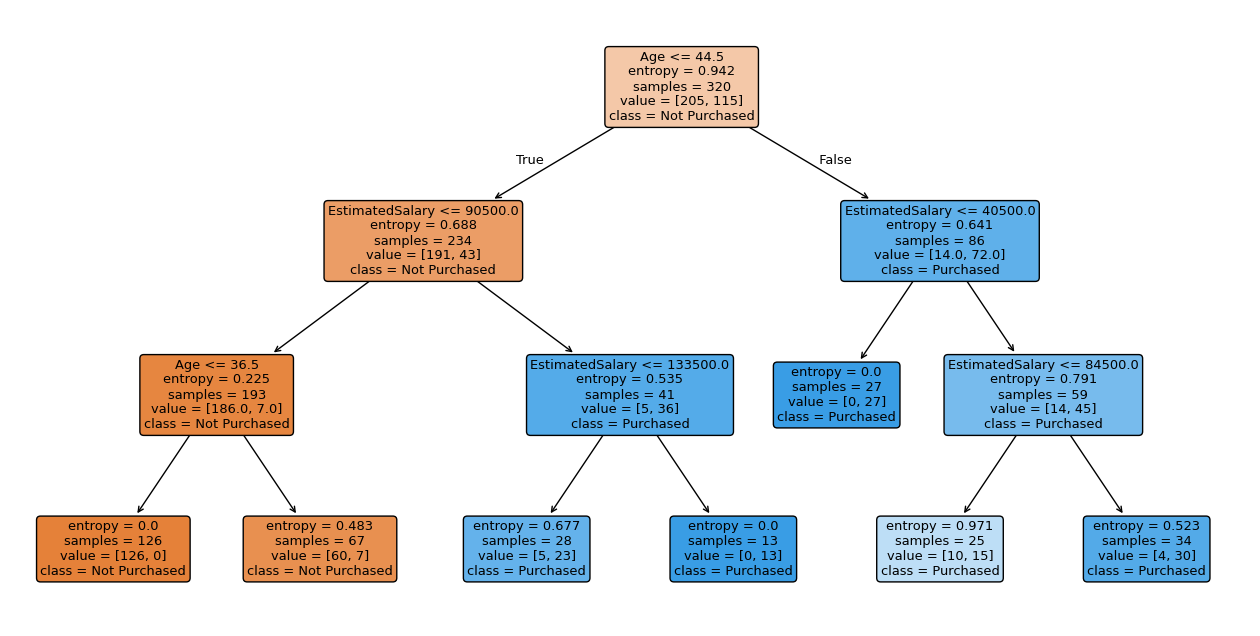

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(
    dt_entropy_simple,
    feature_names=X.columns,
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report (Entropy):")
print(classification_report(y_test, pred_entropy))

print("\nConfusion Matrix (Entropy):")
print(confusion_matrix(y_test, pred_entropy))


Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        52
           1       0.75      0.75      0.75        28

    accuracy                           0.82        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.82      0.82      0.82        80


Confusion Matrix (Entropy):
[[45  7]
 [ 7 21]]


In [12]:
importances = pd.Series(dt_entropy.feature_importances_,
                        index=X.columns)

print("Feature Importance:")
print(importances.sort_values(ascending=False))


Feature Importance:
EstimatedSalary    0.565535
Age                0.423490
Gender             0.010975
dtype: float64
